In [24]:
#!pip install matplotlib-venn

In [25]:
#!apt-get -qq install -y libfluidsynth1

In [26]:
#!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [27]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.6 MB/s eta 0:00:00


In [28]:
pip install pandas matplotlib seaborn wordcloud vaderSentiment

In [29]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib_venn
import numpy as np
import nltk
nltk.download('vader_lexicon')
import seaborn as sns
from wordcloud import WordCloud


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
# Load the dataset
file_path = 'Final_Hotel_Reviews.csv'
hotel_reviews = pd.read_csv(file_path)

In [31]:
# Combine Negative_Review and Positive_Review into a single column
hotel_reviews['Combined_Review'] = hotel_reviews.apply(
    lambda row: str(row['Negative_Review']) + ' ' + str(row['Positive_Review']), axis=1)
#The above line converts the values in 'Negative_Review' and 'Positive_Review' columns to strings before concatenation, handling potential non-string values.

In [32]:
# Label the sentiment: positive, negative, or neutral
def label_sentiment(row):
    if row['Negative_Review'] != "No Negative":
        return 'negative'
    elif row['Positive_Review'] != "No Positive":
        return 'positive'
    else:
        return 'neutral'

In [33]:
hotel_reviews['Sentiment'] = hotel_reviews.apply(label_sentiment, axis=1)


In [34]:
# Function to clean the text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [35]:
# Apply the clean_text function to the Combined_Review column
hotel_reviews['Cleaned_Review'] = hotel_reviews['Combined_Review'].apply(clean_text)

In [36]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [37]:
# Function to analyze sentiment using VADER
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [38]:
# Apply the sentiment analysis function to the Cleaned_Review column
hotel_reviews['VADER_Sentiment'] = hotel_reviews['Cleaned_Review'].apply(analyze_sentiment)

In [39]:
# Display the updated dataframe with VADER_Sentiment column
print(hotel_reviews[['Cleaned_Review', 'Sentiment', 'VADER_Sentiment']].head())

                                      Cleaned_Review Sentiment VADER_Sentiment
0  i am so angry that i made this post available ...  negative        negative
1  no negative no real complaints the hotel was g...  positive        positive
2  rooms are nice but for elderly a bit difficult...  negative        positive
3  my room was dirty and i was afraid to walk bar...  negative        positive
4  you when i booked with your company on line yo...  negative        positive


<ipython-input-40-d2ac131367d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VADER_Sentiment', data=hotel_reviews, palette='viridis')


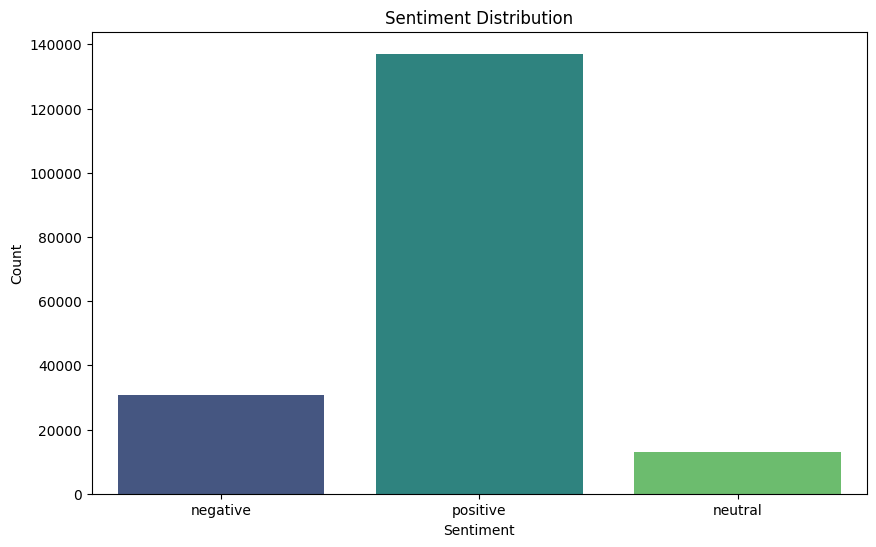

In [40]:
# Sentiment distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(x='VADER_Sentiment', data=hotel_reviews, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

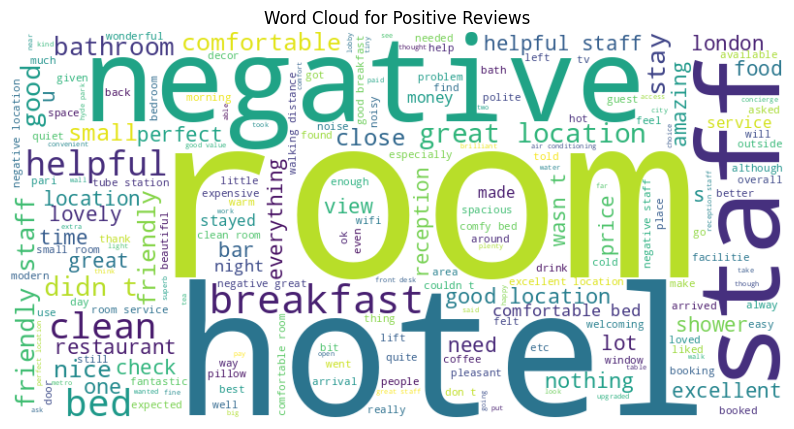

In [41]:
# Generate word cloud for positive reviews
positive_reviews = ' '.join(hotel_reviews[hotel_reviews['VADER_Sentiment'] == 'positive']['Cleaned_Review'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

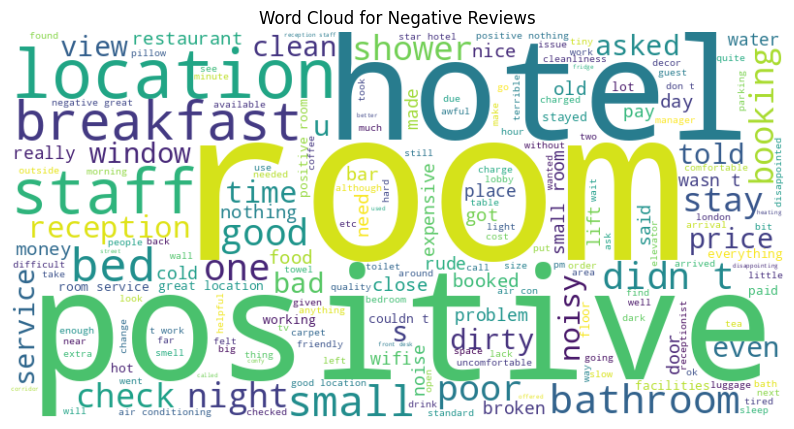

In [42]:
# Generate word cloud for negative reviews
negative_reviews = ' '.join(hotel_reviews[hotel_reviews['VADER_Sentiment'] == 'negative']['Cleaned_Review'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

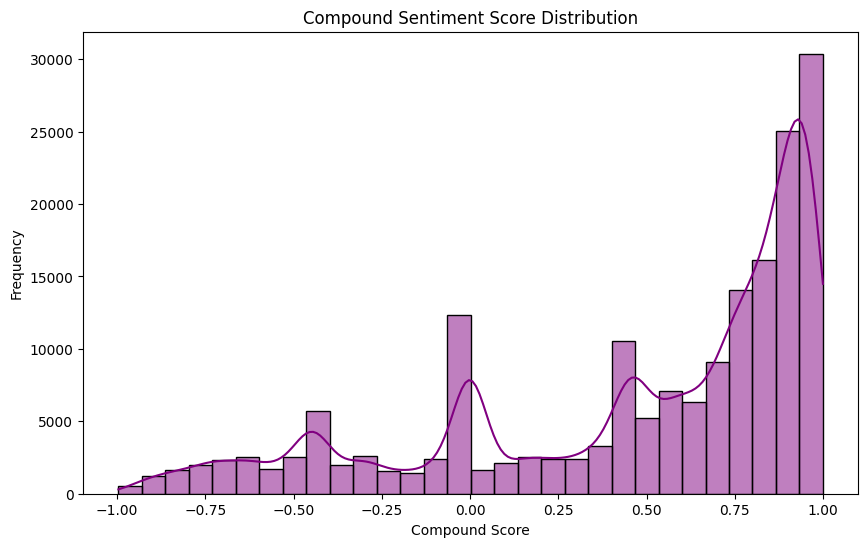

In [43]:
# Calculate compound sentiment scores
hotel_reviews['Compound_Score'] = hotel_reviews['Cleaned_Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Plot distribution of compound sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(hotel_reviews['Compound_Score'], bins=30, kde=True, color='purple')
plt.title('Compound Sentiment Score Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

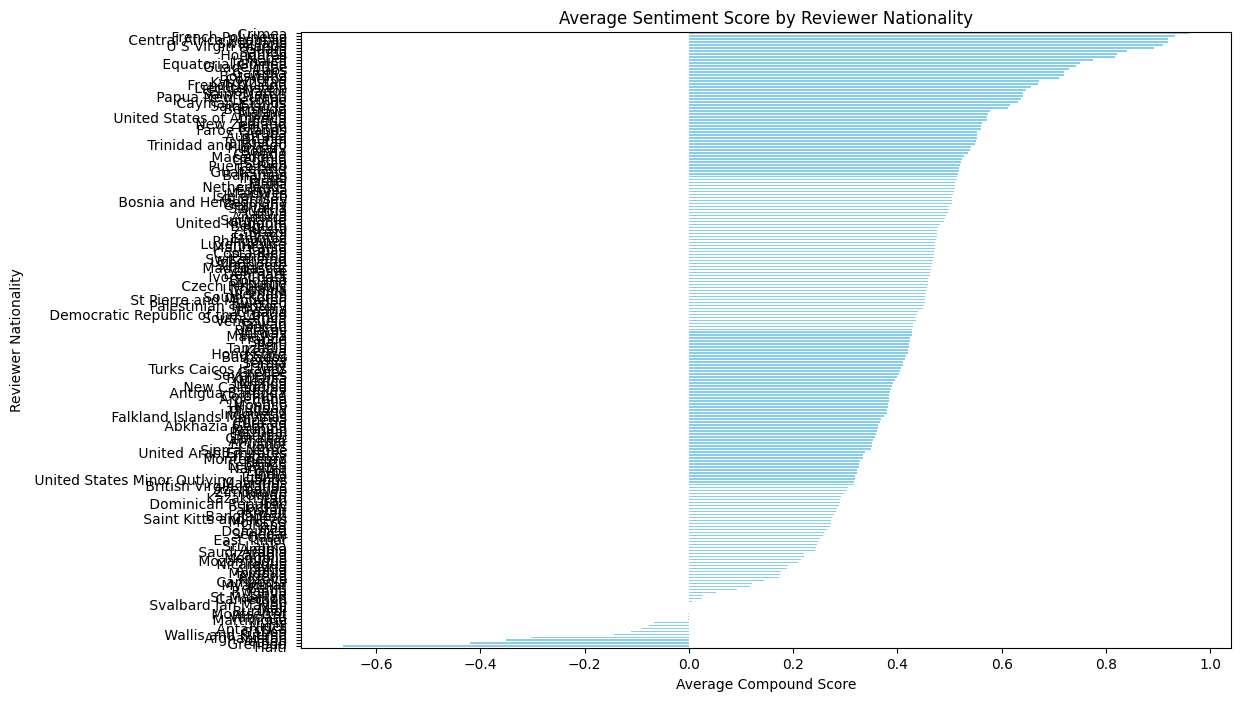

In [44]:
# Average sentiment score by reviewer nationality
avg_sentiment_by_nationality = hotel_reviews.groupby('Reviewer_Nationality')['Compound_Score'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_sentiment_by_nationality.plot(kind='barh', color='skyblue')
plt.title('Average Sentiment Score by Reviewer Nationality')
plt.xlabel('Average Compound Score')
plt.ylabel('Reviewer Nationality')
plt.show()